<a href="https://colab.research.google.com/github/danieldrako/clustering-python-scikitlearn/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar librerías y carga de datos de prueba

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

In [ ]:
df_blobls = pd.DataFrame({
    'x1': x[:,0],
    'x2':x[:,1],
    'y':y

})

In [ ]:
df_blobls

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [ ]:
def plot_2d_clusters(x,y,ax):
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        x[y==_].plot(
            title=f'{len(y_uniques)} Clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker = f'${_}$',
            ax = ax
        )

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


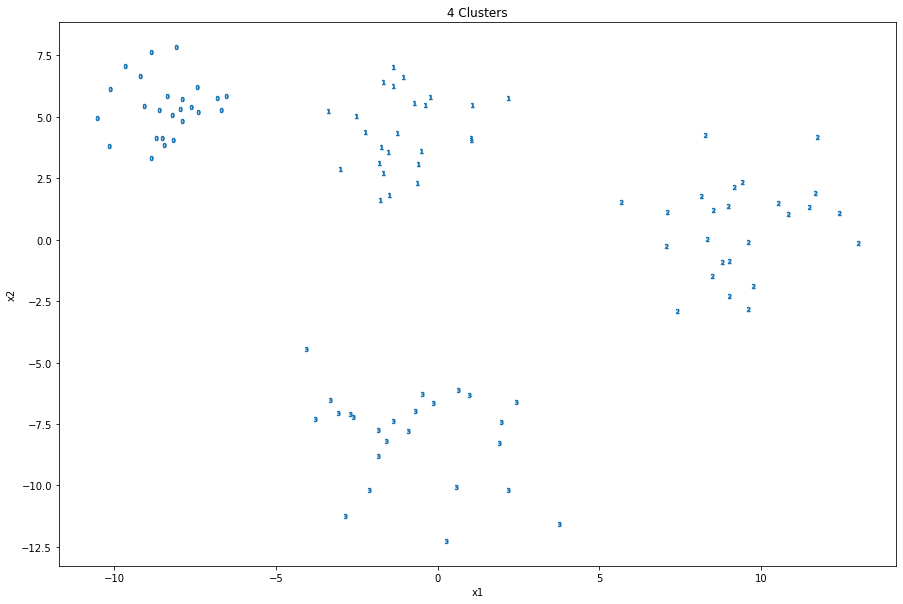

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
x, y = df_blobls[['x1','x2']], df_blobls['y']
plot_2d_clusters(x,y,ax)

## Aplicando clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=7)

In [ ]:
y_pred = kmeans.fit_predict(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_pred

array([0, 3, 4, 0, 4, 0, 3, 2, 4, 1, 3, 2, 3, 4, 0, 1, 1, 2, 3, 4, 0, 4,
       4, 1, 2, 4, 2, 2, 1, 0, 3, 3, 0, 3, 1, 4, 2, 4, 0, 4, 3, 0, 0, 2,
       0, 2, 4, 4, 2, 4, 2, 1, 2, 3, 0, 4, 0, 3, 0, 0, 0, 3, 0, 2, 4, 2,
       4, 2, 2, 0, 4, 2, 4, 4, 2, 2, 2, 2, 3, 0, 0, 0, 4, 3, 2, 3, 2, 4,
       4, 0, 1, 0, 4, 1, 2, 2, 3, 0, 4, 0], dtype=int32)

Text(0.5, 1.0, 'Kmeans 5 Clusters')

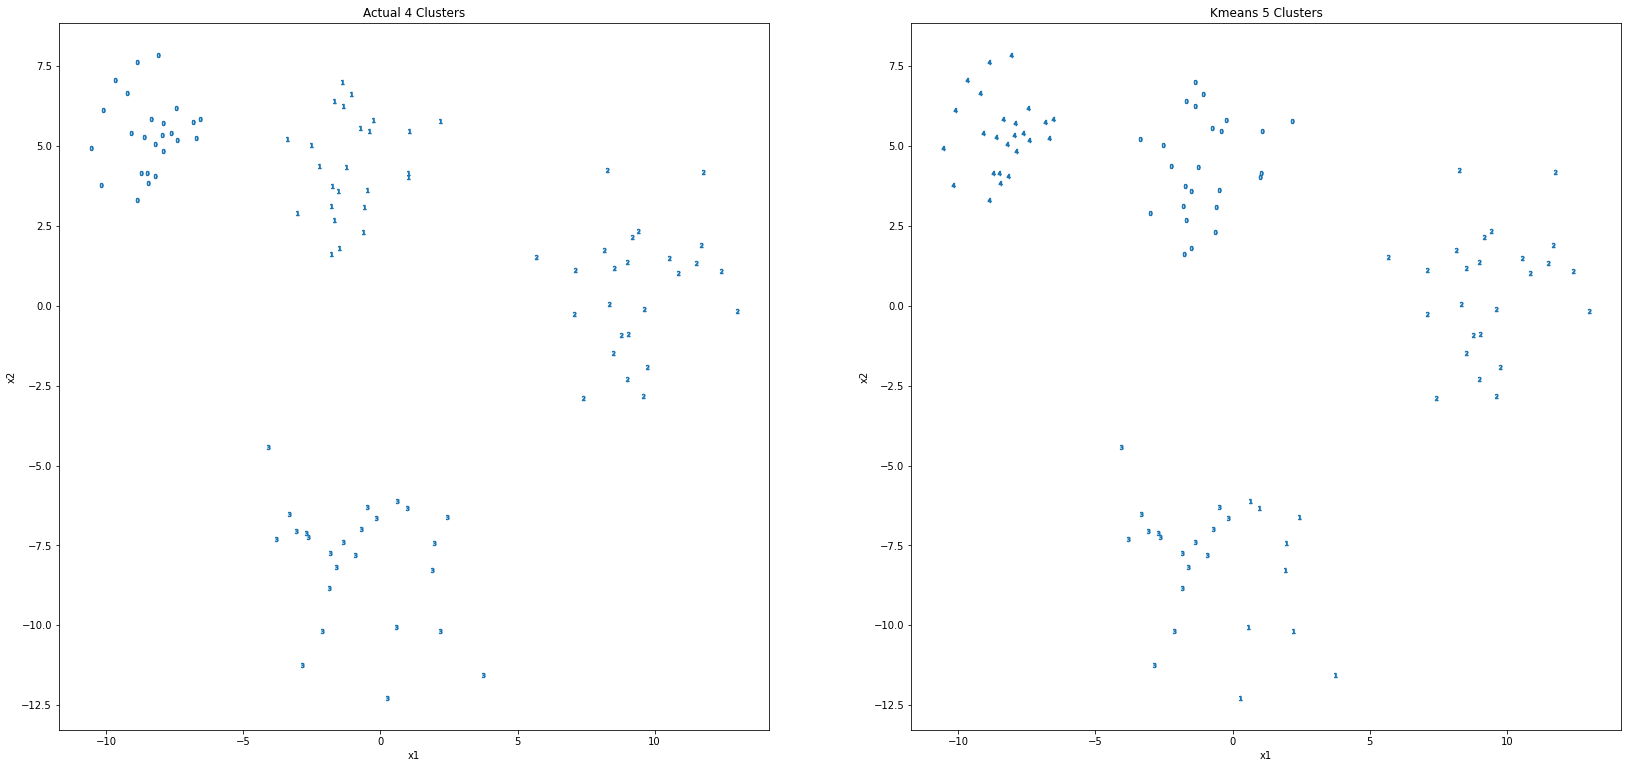

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(28,13))
plot_2d_clusters(x,y,axs[0])
plot_2d_clusters(x,y_pred,axs[1])

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[1].set_title(f'Kmeans {axs[1].get_title()}')

